<h1> linear Regression </h1>

Welcome to the 2nd day of the workshop. Today we are going to implement linear regression from scratch. In the first workshop you learned the use of numpy, pandas and matplotlib, we are going to use all these libraries for developing our model.
There are mainly two classical problems in supervised machine learning: 1) Regression problems 2) Classification problems

Regression Problem:- A regression problem is when the output variable is a real or continuous value, such as “salary” or “weight”. Many different models can be used, the simplest is the linear regression. It tries to fit data with the best hyper-plane which goes through the points. So when ever you see real and continuous output variable understand it is a regression problem.

Classification Problem :- A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease”. A classification model attempts to draw some conclusion from observed values. Given one or more inputs a classification model will try to predict the value of one or more outcomes. For example, when filtering emails “spam” or “not spam”, when looking at transaction data, “fraudulent”, or “authorized”. In short Classification either predicts categorical class labels or classifies data (construct a model) based on the training set and the values (class labels) in classifying attributes and uses it in classifying new data.

So today we are going to implement linear regression from scratch for a regression problem, so let's get started.

In [3]:
#loading all the necessary libraries
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd

We are going to use boston housing price dataset for a given task, it is a classical dataset for a regression task, It contains around 506 data entries containing 13 different features.

In [4]:
dataset = load_boston()

print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
x = dataset.data
y = dataset.target

y = np.expand_dims(y,axis=1)
print("total number of samples in dataset is: {}".format(x.shape[0]))
print("total features in dataset is: {}".format(x.shape[1]))

total number of samples in dataset is: 506
total features in dataset is: 13


One of the most important task in data science and machine learning is the cleaning of data, lucky for us this dataset is alreay cleaned so we can focus on visulization and modelling part. Data visulization is very necessary to understand dependancies of target values to the feature values and also gain some insights regarding what might be the best features to choose to fit the machine learning model. This dataset is prepared containing useful features only so we are going to use every features for now, but anyways visulization is good habit in data science.

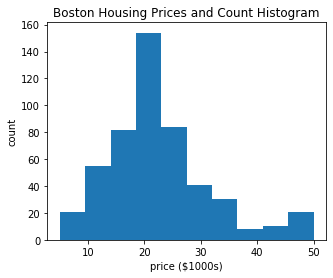

In [6]:
#basic visulization
plt.figure(figsize=(5, 4))
plt.hist(dataset.target)
plt.title('Boston Housing Prices and Count Histogram')
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.show()

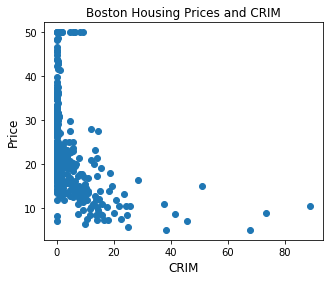

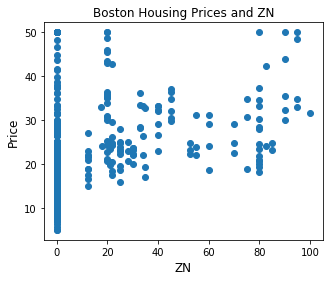

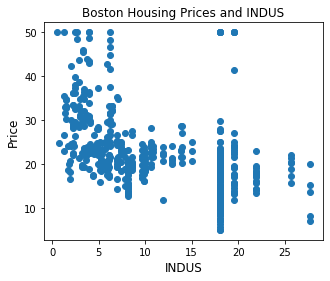

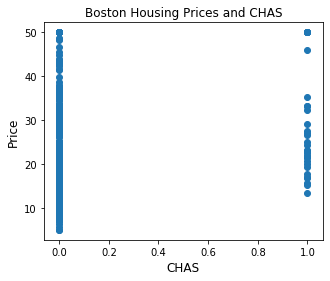

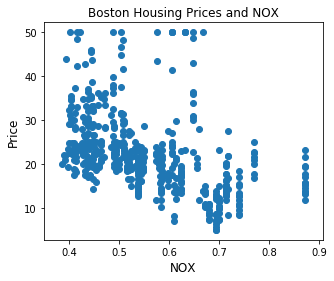

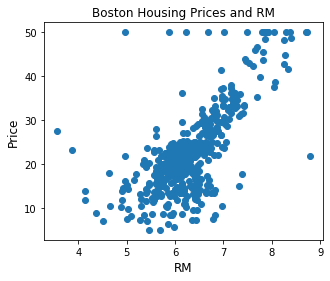

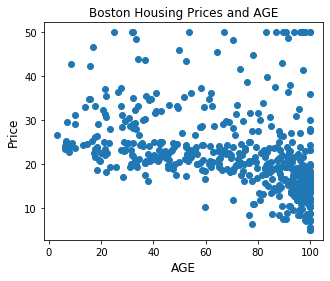

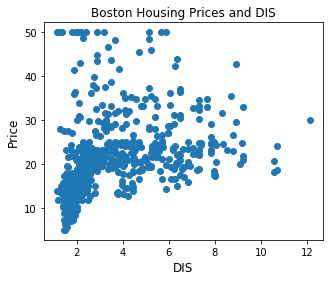

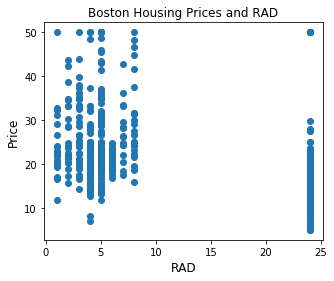

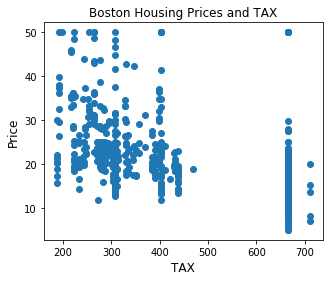

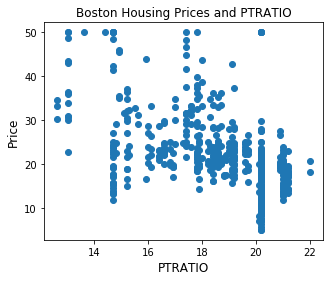

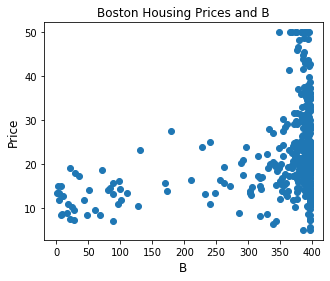

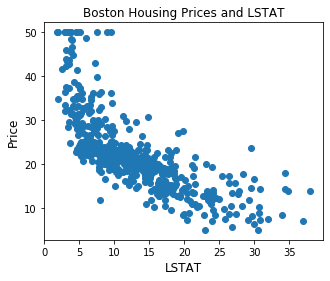

In [8]:
# Plotting every feature relation with target
for index, feature_name in enumerate(dataset.feature_names):
    plt.figure(figsize=(5,4))
    plt.tight_layout()
    label_name = 'Boston Housing Prices and '+ feature_name
    plt.title(label_name)
    plt.scatter(dataset.data[:, index], dataset.target)
    plt.ylabel('Price',size = 12)
    plt.xlabel(feature_name, size = 12)
    plt.show()

<h1>Linear Model</h1>

The idea of linear regression is to fit a line to a set of points. So let's use the line function given by:
f(x)=y=mx+b
 
where m is the slope and b is our y intercept, or for a more general form (multiple variables)
h(x)=θ0x0+θ1x1+θ2x2+...+θnxn
 
such that for a single variable where n = 1,
h(x)=θ0+θ1x1
 
when x0=1
 
where theta is our parameters (slope and intercept) and h(x) is our hypothesis or predicted value

<h1>Magic of Matices</h1>

Also we are going to do computation in vectorized form not iterative for, so let's just brush up the matrix concepts:

Suppose A is our feature matrix X and B as our parameter matrix theta, that is, 
    X=[ 1 2 ] θ=[ 2 3 ]
      [ 1 3 ]
      [ 1 4 ]

Remember that we have our linear model h(x)=θ0x0+θ1x1

We know that X0=[ 1 ] X1=[ 2 ] θT=[ 2 ]
                
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;[ 1 ]&emsp;&emsp;[ 3 ]&emsp;&emsp;[ 3 ]
                
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;[ 1 ]&emsp;&emsp;[ 4 ]

then we can actually use matrix dot product to do the multiplication and addition at the same time (and faster)

H=[ θ0X00+θ1X01 ]=[ θ0+θ1X01 ]=[ 2+3(2) ]=[ 8 ]

  &emsp;&nbsp;[ θ0X10+θ1X11 ]&ensp;&nbsp;[ θ0+θ1X11 ]&ensp;[ 2+3(3) ]&ensp;[ 11 ]

  &emsp;&nbsp;[ θ0X20+θ1X21 ]&ensp;&nbsp;[ θ0+θ1X21 ]&ensp;[ 2+3(4) ]&ensp;[ 14 ]

can be as simple as

H=X dot θ

Yes, that is the power of Matrices!

In [43]:
#initializing the weights
#Task :- initialize vector of zeros according for x dot w remember size of x is (506,13) 
#and one bias vector of one will be add so size will be (506,14) so initialize vector accordingly

# CODE HERE
w = np.zeros((x.shape[1],1))
print(w.shape)

(14, 1)


<h1>Importance of Normalization </h1>

Normalization is very much important, consider a case: house price depends on area of house and rooms in the house, we know that area of houses is in range of 900-100 sqft. while number of bedrooms are at most 5-6, so obviously target values should depend more on house area but that's not the case, so we have to normalize data by mean and standard deviation to get every data points in comparable range. 

Normalization avoids these problems by creating new values that maintain the general distribution and ratios in the source data, while keeping values within a scale applied across all numeric columns used in the model.

Also normalization makes convergence process fast.

In [44]:
def normalize(x,mode='std'):
    n_samples = x.shape# use x.shape and get number of samples
    #code here
    
    x_mean = np.mean(x, axis=0)# find mean of every feature column Hint: use np.mean
    if mode == 'std':
        x_std = np.std(x, axis=0) #find standard deviation of every feature column Hint: use np.std
    else:
        x_std = np.max(x,axis=0) #find maximum of every column Hint : use np.max
    #print(x)
    x = (x-x_mean)/x_std# subtract x_mean from x and divide by x_std 
    #print(x)
    arr = np.ones((n_samples[0],1))
    x = np.hstack((arr,x))   # stacking bias (vector of 1(constant)) to x
    return x

In [45]:
np.random.seed(0)   # do not change seed otherwise answer will not match  
x = np.random.rand(5,5)
x = normalize(x,mode = 'std')
print(x.shape)
print(x)

(5, 6)
[[ 1.         -0.20602098  0.78951027 -0.41884901 -1.72218407  0.17681922]
 [ 1.          0.11854592 -0.22998031  1.34645231  1.12080062  0.03565705]
 [ 1.          0.6060984   0.10534616 -0.6309152   0.86237971 -1.06099139]
 [ 1.         -1.74955693 -1.76276226  0.98513859 -0.13855101  1.74368392]
 [ 1.          1.23093358  1.09788614 -1.28182669 -0.12244524 -0.8951688 ]]


<h3> Answer should match below </h3>
(5, 6)


[[ 1.         -0.20602098  0.78951027 -0.41884901 -1.72218407  0.17681922]
 [ 1.          0.11854592 -0.22998031  1.34645231  1.12080062  0.03565705]
 [ 1.          0.6060984   0.10534616 -0.6309152   0.86237971 -1.06099139]
 [ 1.         -1.74955693 -1.76276226  0.98513859 -0.13855101  1.74368392]
 [ 1.          1.23093358  1.09788614 -1.28182669 -0.12244524 -0.8951688 ]]

<h1> Cost Function </h1>

It is a function that measures the performance of a Machine Learning model for given data. Cost Function quantifies the error between predicted values and expected values and presents it in the form of a single real number. Depending on the problem Cost Function can be formed in many different ways. The purpose of Cost Function is to be either:

Minimized - then returned value is usually called cost, loss or error. The goal is to find the values of model parameters for which Cost Function return as small number as possible.

Maximized - then the value it yields is named a reward. The goal is to find values of model parameters for which returned number is as large as possible.

For algorithms relying on Gradient Descent to optimize model parameters, every function has to be differentiable.

We are going to use mean squared error as a cost function here.

<h1> Mean squared error </h1>

Regression metric which measures the average magnitude of errors in a group of predictions, without considering their directions. In other words, it’s a mean of absolute differences among predictions and expected results where all individual deviations have even importance.

  <h3>MSE&nbsp;=&nbsp;1/N&nbsp;∑<sub>i=1</sub><sup>n</sup>(yi−(mxi+b))<sup>2</sup> </h3>
                        
where:
i - index of sample,
ŷ - predicted value,
y - expected value,
m - number of samples in dataset.

Sometimes it is possible to see the form of formula with swapped predicted value and expected value, but it works the same.

In [46]:
def compute_cost(x,y,w):  
    #CODE HERE
    
    n = x.shape[0]#Get the value of number of samples from x 
    y_hat = np.dot(x,w)# Get the predicted value of y Hint: y_hat = x dot w (use np.dot)
    # Cost function is given above but use 1/(2*n)sum((y_hat - y)^2)
    #squares = np.square((y_hat-y))
    #print (squares)
    cost = np.sum((y_hat-y)**2)/(2*n)# find cost function Hint : np.sum will be useful
    return cost

In [47]:
np.random.seed(0)   # do not change seed otherwise answer will not match 
x_temp = np.random.rand(5,5)
y_temp = np.random.rand(5,1)

w_temp = np.random.rand(6,1)  # using random weights for illustration purpose
x_temp = normalize(x_temp)
cost = compute_cost(x_temp,y_temp,w_temp)

print(cost)

0.2911040132454302


<h2> The answer should match this </h2>

0.2911040132454303

<h1> Gradient descent optimization algorithm </h1>

Gradient Descent is the most common optimization algorithm in machine learning and deep learning. It is a first-order optimization algorithm. This means it only takes into account the first derivative when performing the updates on the parameters. On each iteration, we update the parameters in the opposite direction of the gradient of the objective function J(w) w.r.t the parameters where the gradient gives the direction of the steepest ascent. The size of the step we take on each iteration to reach the local minimum is determined by the learning rate α. Therefore, we follow the direction of the slope downhill until we reach a local minimum.

<img src = "Cost-Function.jpg" />
<br>
<img src = "gradiant_descent.jpg" />

<br>
<h1> Illustration of gradient descent by valley descent example </h1>
<br>
<img src = "gd_illu.jpeg" />

In [48]:
def gradient_descent(x,y,w,iterations,learning_rate):
    no_sample = x.shape[0] #initialize no_sample as above mentioned 
    j = []
    initial_cost = compute_cost(x,y,w)# use compute_cost
    j.append(initial_cost)
    
    #The idea is to update w at every iteration by gradient descent algorithm
    
    for i in range(iterations):
        y_hat =  np.dot(x,w)# calculate predicted values of y
        
        # Now update weight from equation w = w - (learning_rate/no_sample)*(transpose(x) dot (y_hat - y))
        w = w - ((learning_rate/no_sample)*np.dot(x.T, (y_hat-y)))# use np.dot and x.T for transpose
        cost = compute_cost(x,y,w)# use compute_cost
        j.append(cost)
    return (w,j)

In [49]:
np.random.seed(0)   # do not change seed otherwise answer will not match 
x_temp = np.random.rand(5,5)
y_temp = np.random.rand(5,1)

w_temp = np.random.rand(6,1)  # using random weights for illustration purpose
x_temp = normalize(x_temp)

w_temp,j_temp = gradient_descent(x_temp,y_temp,w_temp,1000,0.001)
print("Weights after updation: {}".format(w_temp))
print("Initial cost: {}".format(j_temp[0]))
print("final cost after updation: {}".format(j_temp[-1]))

Weights after updation: [[ 0.43422511]
 [ 0.6546597 ]
 [ 0.31910619]
 [ 0.34074398]
 [-0.04576342]
 [ 0.6052419 ]]
Initial cost: 0.2911040132454302
final cost after updation: 0.16799557602888987


<h2> The answer should match this </h2>

Weights after updation: [[ 0.43422511]

 [ 0.6546597 ]
 
 [ 0.31910619]
 
 [ 0.34074398]
 
 [-0.04576342]
 
 [ 0.6052419 ]]
 
Initial cost: 0.2911040132454303

final cost after updation: 0.1679955760288899

<h3> Training time </h3>
We are setting learning rate to 0.001 you can tweak the learning rate and check the results for your self, Learning rate is known as hyperparameter in machine learning tearms and setting up optimum learning rate is quite a challanging task some times.

Generally we split data in train set and validation set by using sklearn.model_selection.train_test_split(x,y) but here we have very less training example so we are going to use all data for training.

In [50]:
iteration = 4000
lr = 0.001
x = dataset.data
y = dataset.target
y = np.expand_dims(y,axis=1)
x = normalize(x)
w,j = gradient_descent(x,y,w,iteration,lr)

<h2> Cost convergence graph </h2>

As we can see from the below graph, the cost is decreasing with each iteration, the graph below shows us that the training is stable and we have selected optimum learning rate, if cost in graph overshoots or increase with time in some iterations then we know that the learning rate is not optimum and we have to change it!

Text(0.5, 1.0, 'convergence graph of cost function')

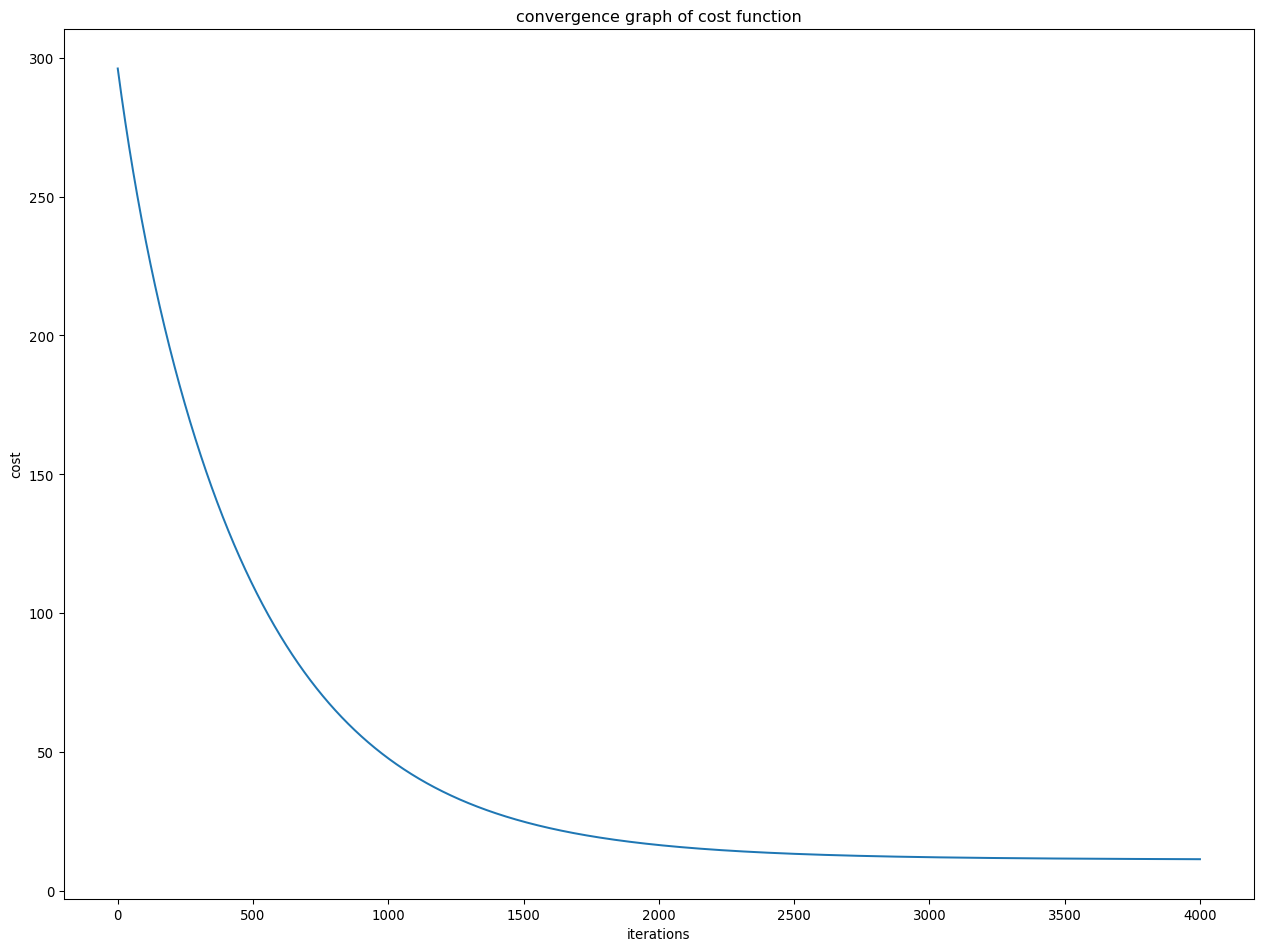

In [51]:
t = np.arange(iteration + 1)

plt.figure(figsize = (16,12),dpi = 96)
plt.plot(t,j)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title('convergence graph of cost function')

In [52]:
print('Initial cost = {}'.format(j[0]))
print('final cost = {}'.format(j[-1]))

Initial cost = 296.0734584980237
final cost = 11.534045498022655


We can not simply measure accuracy by checking how much predictions are correct as we can in classification problem, so we have to device some method to measure accuracy. we are going to use equation 1 - (sum((y-y_hat)2)/sum((y-mean(y))2) for the accuracy measurement.

In [53]:
def score(x,y,w):
    x = normalize(x)
    y = np.expand_dims(y,axis = 1)
    
    y_hat = np.dot(x,w)
    score = 1.0 - ((np.sum((y - y_hat)**2))/(np.sum((y - np.mean(y))**2)))
    return score

In [54]:
x_test = dataset.data
y_test = dataset.target

s = score(x_test,y_test,w)
print('score of the system is : {}'.format(s))

score of the system is : 0.726744701744555


We have got quite a good accuracy with such a simple model on this multi featured dataset. quite an accomplishment cheer up!

In [55]:
def predict(x,w):
    n_samples = x.shape[0]
    x = normalize(x)
    
    y = np.dot(x,w)
    return y

In [57]:
x_test = dataset.data
y = predict(x_test,w)

print(y) #uncomment the commented value to see values

[[30.24395757]
 [24.66557075]
 [30.62155534]
 [29.13012782]
 [28.65915013]
 [25.38909394]
 [22.82449577]
 [19.87540472]
 [12.0834598 ]
 [19.43181671]
 [19.79422507]
 [21.71534615]
 [20.92643094]
 [19.93590655]
 [19.60384755]
 [19.52318676]
 [20.90902559]
 [17.30460046]
 [15.99838695]
 [18.23943564]
 [12.59962064]
 [17.8225239 ]
 [16.36395059]
 [14.15365574]
 [16.11102046]
 [13.63472675]
 [15.90008616]
 [15.32396163]
 [20.25060307]
 [21.60266798]
 [11.97830399]
 [18.28006043]
 [ 9.69590475]
 [14.31662057]
 [14.09529442]
 [22.55983655]
 [21.157435  ]
 [22.22356741]
 [22.21745693]
 [29.56515187]
 [32.65975358]
 [28.09155063]
 [24.84665435]
 [24.3786642 ]
 [22.50287725]
 [21.1042246 ]
 [19.72795255]
 [17.77232728]
 [ 9.05489189]
 [16.84154176]
 [20.81081439]
 [23.28733721]
 [27.312006  ]
 [23.484193  ]
 [16.60694825]
 [30.49262235]
 [25.40584652]
 [31.55672664]
 [21.68105468]
 [20.35842194]
 [17.25961803]
 [17.74019269]
 [23.55861139]
 [23.0750878 ]
 [25.05669358]
 [28.93088227]
 [23.93671

In [59]:
print(dataset.target)   #uncomment the commented value to see values

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

So you can check predicted y values and also original target values they are very near to each other, so we have trained a good model with such a few lines of code! That's the power of machine learning and you are all set to implement this knowledge to tackle a real world problem!

Cheers! see you next time!